# Hello everyone its day 16  Today I have data of  Credit Card Spending Habits in Various cities of india 

# Data_Cleaning

In [2]:
## import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [4]:
##red data useing csv
data=pd.read_csv("Credit Card Transactions  India.csv")

##drop index column 
data.drop(columns=['index'],inplace=True)

## first five rows of data
data.head()

City       Date  Card Type Exp Type Gender  Amount
0           Delhi, India  29-Oct-14       Gold    Bills      F   82475
1  Greater Mumbai, India  22-Aug-14   Platinum    Bills      F   32555
2       Bengaluru, India  27-Aug-14     Silver    Bills      F  101738
3  Greater Mumbai, India  12-Apr-14  Signature    Bills      F  123424
4       Bengaluru, India   5-May-15       Gold    Bills      F  171574

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [6]:
data.describe()

Amount
count   26052.000000
mean   156411.537425
std    103063.254287
min      1005.000000
25%     77120.250000
50%    153106.500000
75%    228050.000000
max    998077.000000

In [7]:
data.isnull().sum()

City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

In [8]:
data[['day','month','year']]=data['Date'].str.split('-' , expand=True)

In [9]:
# defineing a function to clasify the purchase price 
def purchase_range(amount):
    if amount<=1000:
        amt='less then 1000'
    elif amount>1000 and amount <=5000:
        amt='less then 5000'
    elif amount >5000 and amount<=10000:
        amt='less then 10000'
    elif amount >10000 and amount <=15000:
        amt='less then 15000'
    else:
        amt='greter then 15000'
    return amt 

##apply function 
data['amount_category']=data.Amount.apply(purchase_range)


##view data
data.head()

City       Date  Card Type Exp Type Gender  Amount day  \
0           Delhi, India  29-Oct-14       Gold    Bills      F   82475  29   
1  Greater Mumbai, India  22-Aug-14   Platinum    Bills      F   32555  22   
2       Bengaluru, India  27-Aug-14     Silver    Bills      F  101738  27   
3  Greater Mumbai, India  12-Apr-14  Signature    Bills      F  123424  12   
4       Bengaluru, India   5-May-15       Gold    Bills      F  171574   5   

  month year    amount_category  
0   Oct   14  greter then 15000  
1   Aug   14  greter then 15000  
2   Aug   14  greter then 15000  
3   Apr   14  greter then 15000  
4   May   15  greter then 15000

# EDA

# Countplot of card type 

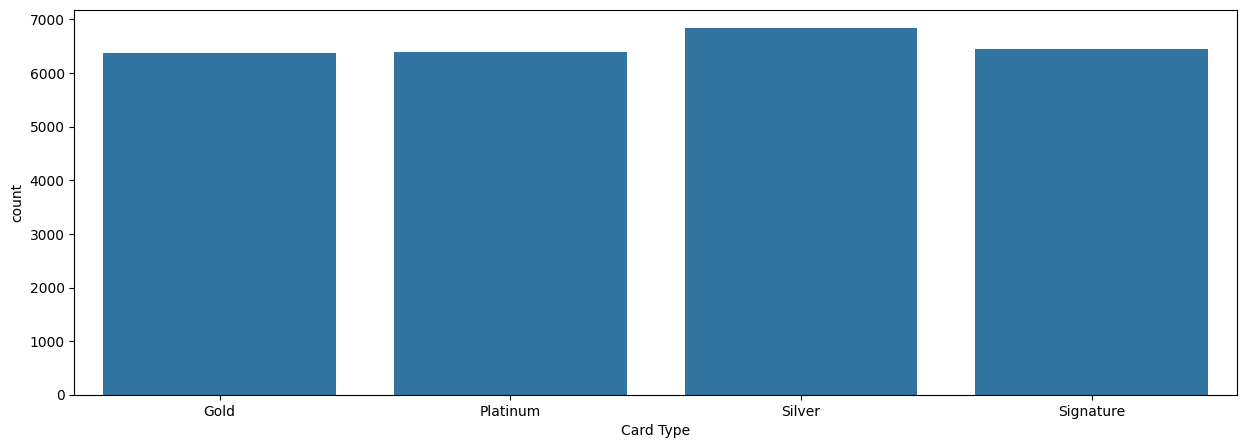

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x='Card Type')
plt.show()

countplot of expansive type 

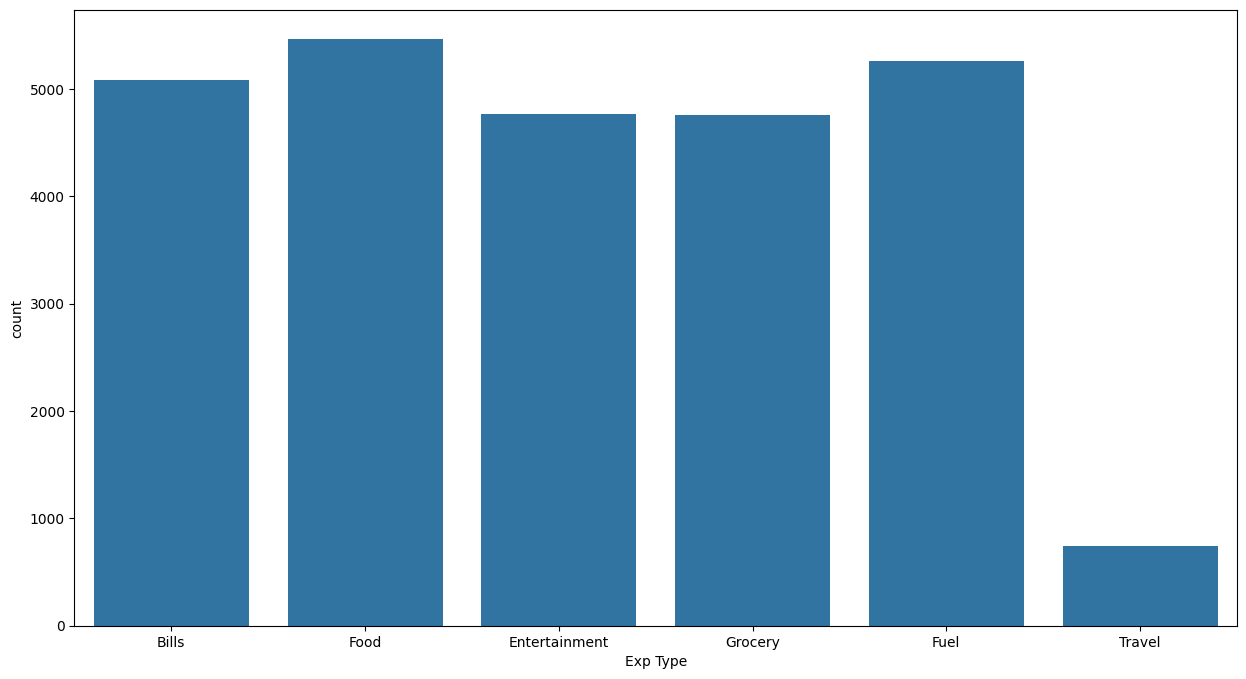

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(data=data,x='Exp Type')
plt.show()

cheaking expansive type with  gender use 

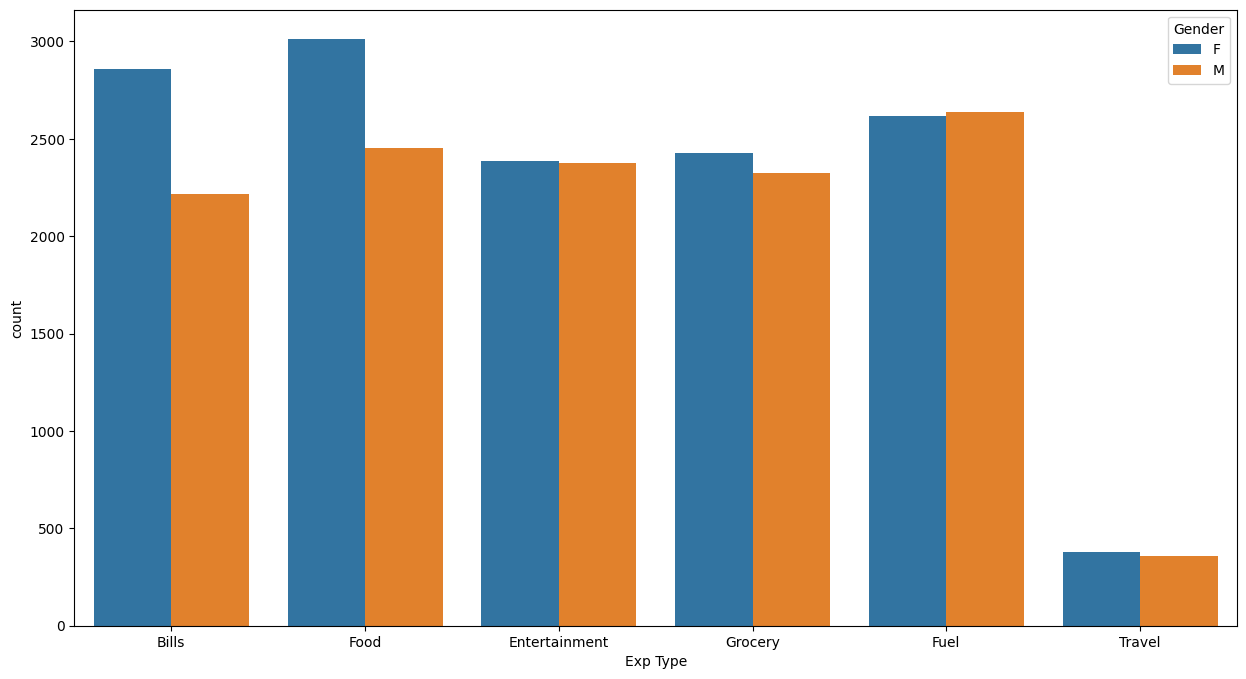

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(data=data,x='Exp Type',hue='Gender')
plt.show()

cheaking card type gender wise 

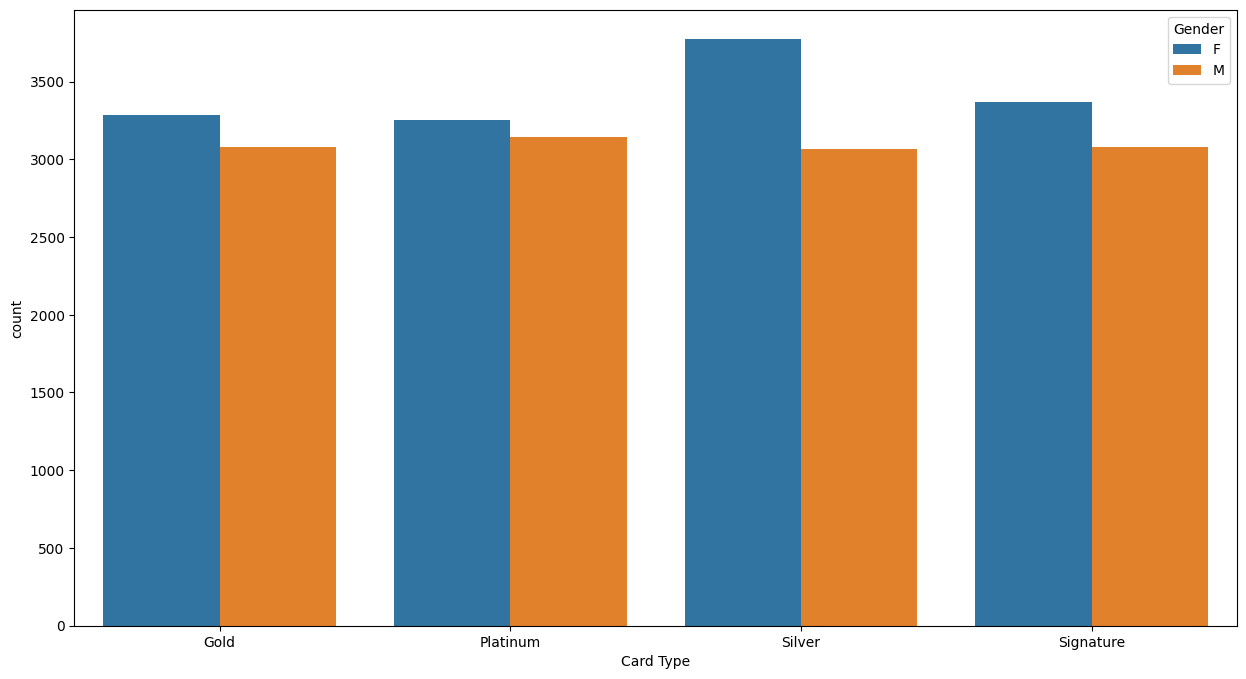

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(data=data,x='Card Type',hue='Gender')
plt.show()

cheaking amount spend monthly 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


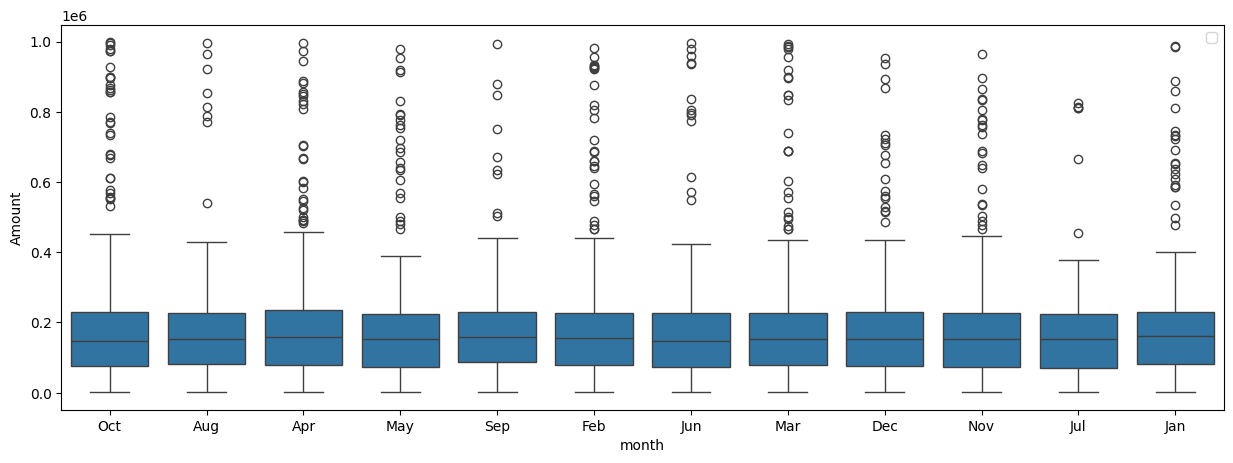

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data,x='month',y='Amount')
plt.legend()
plt.show()

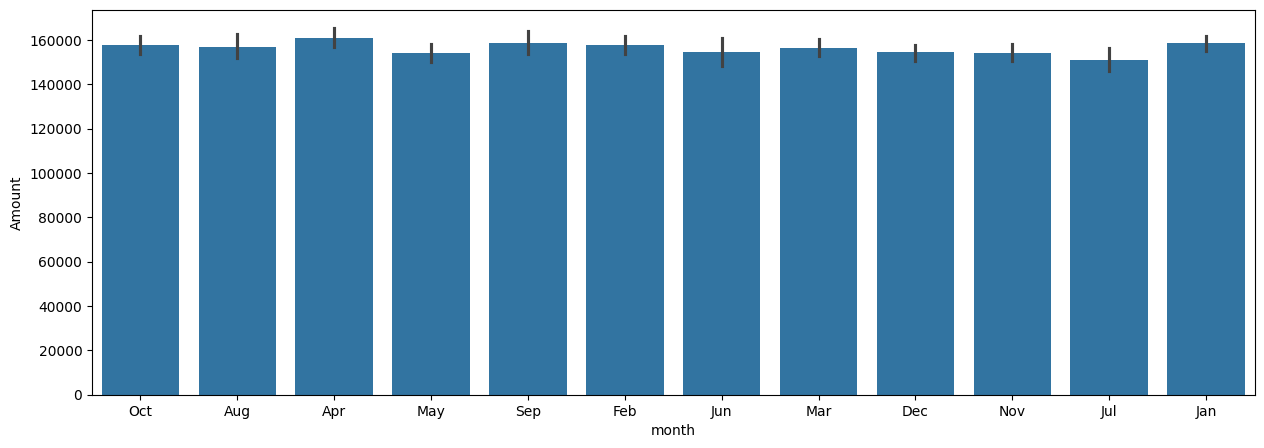

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='month',y='Amount')
plt.show()

voilin plot of card amount 

plot pie chart of amount and card type 

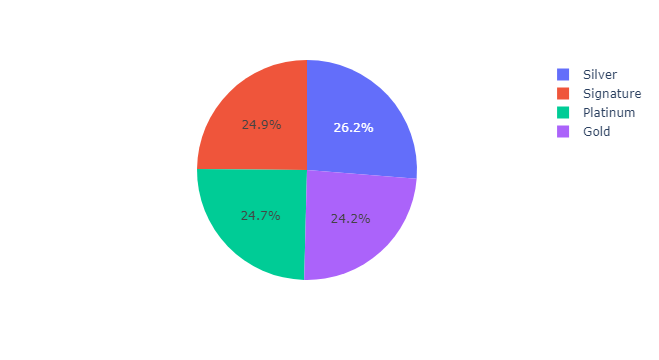

In [104]:
fig8 = px.pie(data, values='Amount', names='Card Type')
fig8.show()

pie plot of amount and gender 

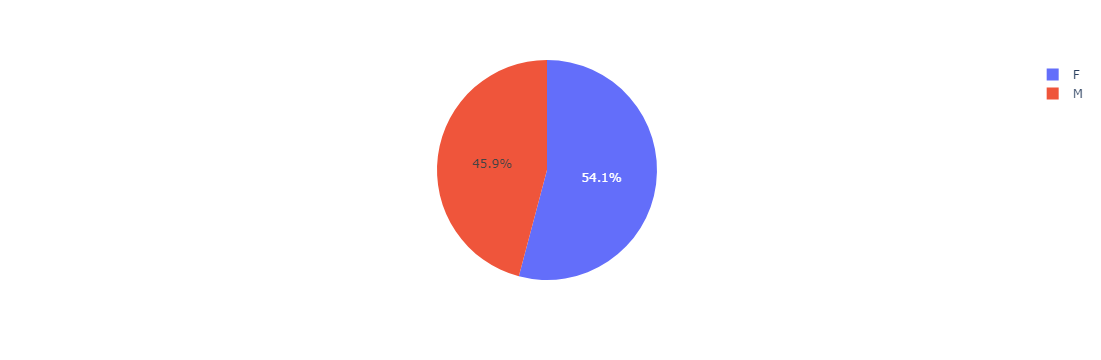

In [106]:
fig=px.pie(data,values='Amount',names='Gender')

fig.show()

pie plot of expanse and amount

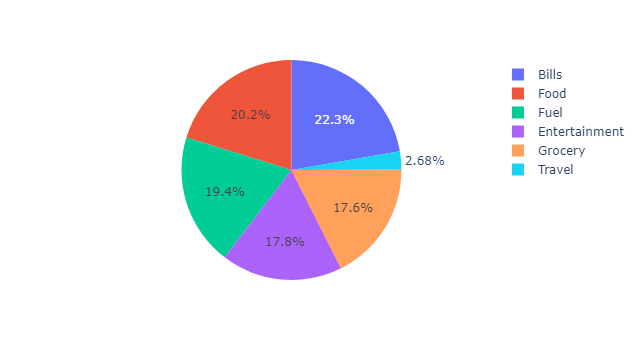

In [108]:
fig=px.pie(data,values='Amount',names='Exp Type')
fig.show()

# Distribution Plot Of Amount And Year 

<Figure size 1500x800 with 0 Axes>

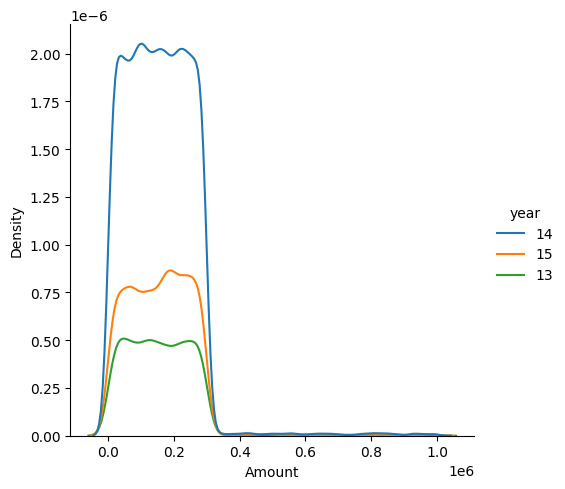

In [114]:
plt.figure(figsize=(15,8))
sns.displot(data=data,x='Amount',hue='year',kind='kde')
plt.show()

# Distribution of Amount and Card type

<Figure size 1500x800 with 0 Axes>

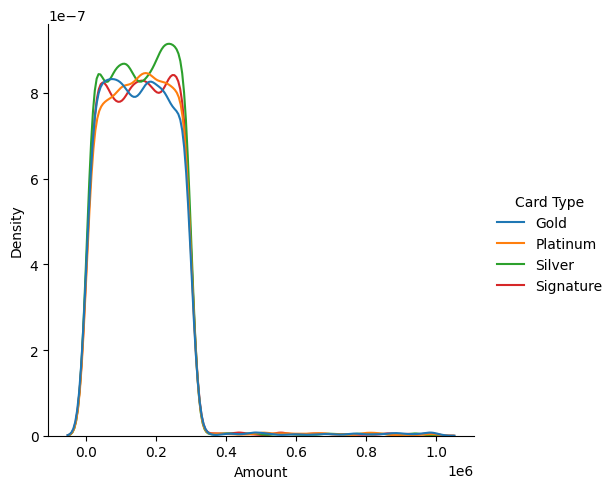

In [115]:
plt.figure(figsize=(15,8))
sns.displot(data=data,x='Amount',hue='Card Type',kind='kde')
plt.show()

# Distribution of Amount And Month

<Figure size 1500x800 with 0 Axes>

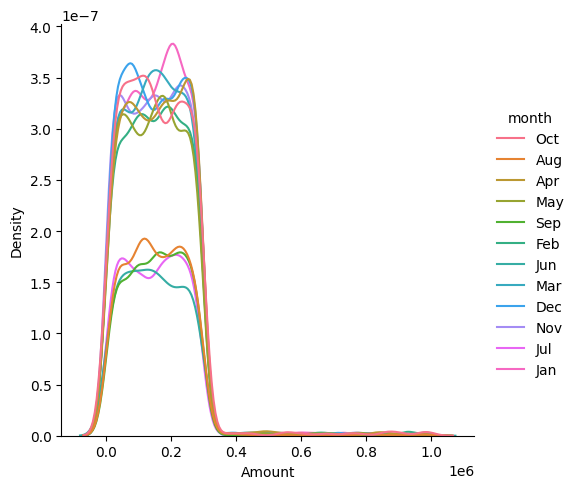

In [117]:
plt.figure(figsize=(15,8))
sns.displot(data=data,x='Amount',hue='month',kind='kde')
plt.show()

# Model Building and Spilit Data into Category

In [ ]:
##label encodeing and drop date column 
data['City']=LabelEncoder().fit_transform(data['City'])
data['Card Type']=LabelEncoder().fit_transform(data['Card Type'])
data['Exp Type']=LabelEncoder().fit_transform(data['Exp Type'])
data['Gender']=LabelEncoder().fit_transform(data['Gender'])
data['month']=LabelEncoder().fit_transform(data['month'])
data['amount_category']=LabelEncoder().fit_transform(data['amount_category'])
data.drop(columns='Date',inplace=True)

In [170]:
x=data[['City', 'Card Type', 'Exp Type', 'Gender', 
       'year','month']]
y=data['amount_category']

In [171]:
## split data into train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((20841, 6), (5211, 6), (20841,), (5211,))

In [172]:
models = {}
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
predicted=lr_model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
models['logistic_regression'] = accuracy_score(y_test, predicted)*100

Confusion Matrix : 
 [[4984    0    0    0]
 [  82    0    0    0]
 [  72    0    0    0]
 [  73    0    0    0]]


The accuracy of Logistic Regression is :  95.64383035885626 %


C:\Users\kabir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [173]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
  
predicted = gnb_model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")
models['Gaussian_Naive_Bayes'] = accuracy_score(y_test, predicted)*100

The accuracy of Gaussian Naive Bayes model is :  95.64383035885626 %


In [174]:
bnb_model = BernoulliNB()
bnb_model.fit(x_train, y_train)
  
predicted = bnb_model.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")
models['Bernoulli_Naive_Bayes'] = accuracy_score(y_test, predicted)*100

The accuracy of Gaussian Naive Bayes model is :  95.64383035885626 %


In [175]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
  
predicted = svm_model.predict(x_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")
models['svm'] = accuracy_score(y_test, predicted)*100

The accuracy of SVM is :  95.64383035885626 %


In [176]:
knn_model = KNeighborsClassifier(n_neighbors = 1)  
knn_model.fit(x_train, y_train)
predicted = knn_model.predict(x_test)
  

print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted)*100, "%")
models['knn'] = accuracy_score(y_test, predicted)*100

[[4757   76   71   80]
 [  80    0    0    2]
 [  68    1    2    1]
 [  66    0    4    3]]
The accuracy of KNN is :  91.38361159086547 %


Text(0, 0.5, 'Error Rate')

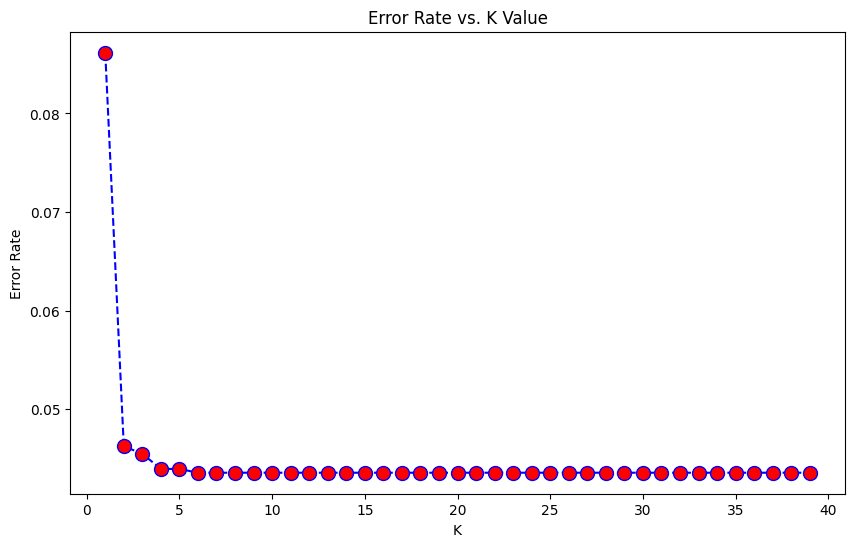

In [177]:
# Optimizing KNN
error_rate = []
  
for i in range(1, 40):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [178]:
# k = 6
knn_o_model = KNeighborsClassifier(n_neighbors = 6)
  
knn_o_model.fit(x_train, y_train)
predicted = knn_o_model.predict(x_test)
  
print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print()
print()
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted)*100, "%")
models['Optimized_knn'] = accuracy_score(y_test, predicted)*100

Confusion Matrix :
[[4984    0    0    0]
 [  82    0    0    0]
 [  72    0    0    0]
 [  73    0    0    0]]


The accuracy of KNN is :  95.64383035885626 %


In [179]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(x_train, y_train)
   
predicted = xgb_model.predict(x_test)
   
cm = confusion_matrix(y_test, predicted)
print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")
models['X_Gradient_Boosting'] = accuracy_score(y_test, predicted)*100

C:\Users\kabir\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.




The accuracy of X Gradient Boosting is :  95.64383035885626 %


In [180]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
rf_model.fit(x_train, y_train)  
predicted = rf_model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")
models['random_forest'] = accuracy_score(y_test, predicted.round())*100

The accuracy of Random Forest is :  90.07867971598542 %


In [181]:
for model in models:
    print(str(model)," : ",str(models[model]))

logistic_regression  :  95.64383035885626
Gaussian_Naive_Bayes  :  95.64383035885626
Bernoulli_Naive_Bayes  :  95.64383035885626
svm  :  95.64383035885626
knn  :  91.38361159086547
Optimized_knn  :  95.64383035885626
X_Gradient_Boosting  :  95.64383035885626
random_forest  :  90.07867971598542


In [185]:
model_keys = models.keys()
model_values = models.values()

In [186]:
fig = px.histogram(x=model_keys, 
             y=model_values,
             color=model_keys,
             title='Models v/s Accuracy'
            )
fig.show()

# Thanks for reading till the end ! If you liked the  EDA, Model Training, Model Evaluation and Comparison, Predtictions  pls do Upvote👍 and give some remarks/advice if you feels some things need to be added